CPD for variable: Intelligence
+-----------------+-----+
| Intelligence(0) | 0.7 |
+-----------------+-----+
| Intelligence(1) | 0.3 |
+-----------------+-----+

CPD for variable: Study Time
+---------------+-----+
| Study Time(0) | 0.6 |
+---------------+-----+
| Study Time(1) | 0.4 |
+---------------+-----+

CPD for variable: Exam Performance
+---------------------+-----------------+-----------------+-----------------+-----------------+
| Intelligence        | Intelligence(0) | Intelligence(0) | Intelligence(1) | Intelligence(1) |
+---------------------+-----------------+-----------------+-----------------+-----------------+
| Study Time          | Study Time(0)   | Study Time(1)   | Study Time(0)   | Study Time(1)   |
+---------------------+-----------------+-----------------+-----------------+-----------------+
| Exam Performance(0) | 0.9             | 0.6             | 0.7             | 0.1             |
+---------------------+-----------------+-----------------+-----------------+

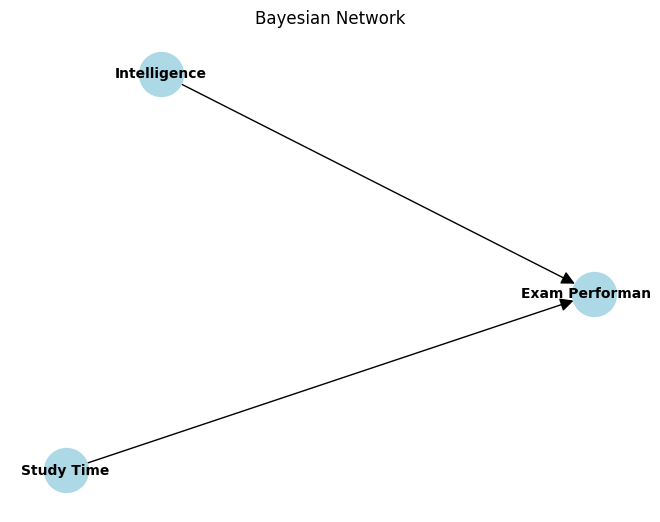

  0%|          | 0/999 [00:00<?, ?it/s]

Normalize <Good Performance, Poor Performance>:
Good Performance: 0.3030
Poor Performance: 0.6970


In [5]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network
model = BayesianNetwork([('Intelligence', 'Exam Performance'), ('Study Time', 'Exam Performance')])

# Define CPDs
cpd_intelligence = TabularCPD(variable='Intelligence', variable_card=2, values=[[0.7], [0.3]])
cpd_study_time = TabularCPD(variable='Study Time', variable_card=2, values=[[0.6], [0.4]])
cpd_performance = TabularCPD(
    variable='Exam Performance',
    variable_card=2,
    values=[[0.9, 0.6, 0.7, 0.1], [0.1, 0.4, 0.3, 0.9]],
    evidence=['Intelligence', 'Study Time'],
    evidence_card=[2, 2],
)

# Add CPDs to the model
model.add_cpds(cpd_intelligence, cpd_study_time, cpd_performance)

# Check model
assert model.check_model()

# Print CPDs
for cpd in model.get_cpds():
    print("CPD for variable:", cpd.variable)
    print(cpd)
    print()

# Visualize the Bayesian Network
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=42)  # Set seed for consistent layout
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1000,
    node_color='lightblue',
    font_size=10,
    font_color='black',
    font_weight='bold',
    arrowsize=20,
)
plt.title("Bayesian Network")
plt.show()

# Gibbs Sampling
gibbs_sampler = GibbsSampling(model)
n = 1000  # Number of samples
samples = gibbs_sampler.sample(size=n)

# Calculate probabilities of "Good" and "Poor" performance
count_performance_good = (samples['Exam Performance'] == 1).sum()
count_performance_poor = (samples['Exam Performance'] == 0).sum()

normalize_value_good = count_performance_good / n
normalize_value_poor = count_performance_poor / n

print('Normalize <Good Performance, Poor Performance>:')
print(f"Good Performance: {normalize_value_good:.4f}")
print(f"Poor Performance: {normalize_value_poor:.4f}")


In [3]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.7 MB/s eta 0:00:00
